In [59]:
# Data manipulation & visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Load Data

In [60]:
data_file='Data/diabetes_binary_health_indicators_BRFSS2015.csv'
data_description='Data/Diabetes_Variable_Description.xlsx'

In [61]:
# Display the diabetes dataset's column information
desc = pd.read_excel(data_description)
pd.set_option('display.max_colwidth', None)
desc[['Variable Name', 'Type', 'Description']]


Variable Name     Type  \
0                     ID  Integer   
1        Diabetes_binary   Binary   
2                 HighBP   Binary   
3               HighChol   Binary   
4              CholCheck   Binary   
5                    BMI  Integer   
6                 Smoker   Binary   
7                 Stroke   Binary   
8   HeartDiseaseorAttack   Binary   
9           PhysActivity   Binary   
10                Fruits   Binary   
11               Veggies   Binary   
12     HvyAlcoholConsump   Binary   
13         AnyHealthcare   Binary   
14           NoDocbcCost   Binary   
15               GenHlth  Integer   
16              MentHlth  Integer   
17              PhysHlth  Integer   
18              DiffWalk   Binary   
19                   Sex   Binary   
20                   Age  Integer   
21             Education  Integer   
22                Income  Integer   

                                                                                                                                                                                                                                                                                                                                Description  
0                                                                                                                                                                                                                                                                                                                                Patient ID  
1                                                                                                                                                                                                                                                                                               0 = no diabetes 1 = prediabetes or diabetes  
2                                                                                                                                                                                                                                                                                                                0 = no high BP 1 = high BP  
3                                                                                                                                                                                                                                                                                              0 = no high cholesterol 1 = high cholesterol  
4                                                                                                                                                                                                                                                                  0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years  
5                                                                                                                                                                                                                                                                                                                           Body Mass Index  
6                                                                                                                                                                                                                              Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes  
7                                                                                                                                                                                                                                                                                              (Ever told) you had a stroke. 0 = no 1 = yes  
8                                                                                                                   

In [62]:
# Import the Diabetes dataset:
data = pd.read_csv(data_file) 

## Perform EDA

In [63]:
data.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [64]:
data.tail()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[5 rows x 22 columns]

In [65]:
data.shape

(253680, 22)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [67]:
# Check for missing values
data.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [68]:
# Check for duplicates
data.duplicated().sum()

24206

In [69]:
# Identify all duplicate rows
data[data.duplicated(keep=False)]

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
5                   0.0     1.0       1.0        1.0  25.0     1.0     0.0   
25                  0.0     0.0       0.0        1.0  32.0     0.0     0.0   
29                  0.0     0.0       1.0        1.0  31.0     1.0     0.0   
44                  0.0     0.0       1.0        1.0  31.0     1.0     0.0   
52                  1.0     1.0       1.0        1.0  27.0     1.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253492              1.0     1.0       1.0        1.0  33.0     0.0     0.0   
253550              0.0     0.0       0.0        1.0  25.0     0.0     0.0   
253563              0.0     0.0       1.0        1.0  24.0     1.0     0.0   
253597              0.0     0.0       0.0        1.0  24.0     0.0     0.0   
253638              0.0     0.0       0.0        1.0  24.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
5                        0.0           1.0     1.0  ...            1.0   
25                       0.0           1.0     1.0  ...            1.0   
29                       0.0           1.0     1.0  ...            1.0   
44                       0.0           0.0     1.0  ...            1.0   
52                       0.0           0.0     0.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253492                   0.0           1.0     1.0  ...            1.0   
253550                   0.0           1.0     1.0  ...            1.0   
253563                   0.0           1.0     1.0  ...            1.0   
253597                   0.0           1.0     1.0  ...            1.0   
253638                   0.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
5               0.0      2.0       0.0       2.0       0.0  1.0  10.0   
25              0.0      2.0       0.0       0.0       0.0  0.0   5.0   
29              0.0      1.0       0.0       0.0       0.0  1.0  12.0   
44              0.0      2.0       0.0       0.0       0.0  0.0   8.0   
52              0.0      5.0       0.0      30.0       1.0  0.0  10.0   
...             ...      ...       ...       ...       ...  ...   ...   
253492          0.0      3.0       0.0       0.0       0.0  1.0   9.0   
253550          0.0      1.0       0.0       0.0       0.0  0.0   7.0   
253563          0.0      2.0       0.0       0.0       0.0  1.0   8.0   
253597          0.0      2.0       0.0       0.0       0.0  0.0   5.0   
253638          0.0      2.0       0.0       0.0       0.0  1.0   1.0   

        Education  Income  
5             6.0     8.0  
25            6.0     8.0  
29            6.0     8.0  
44            5.0     8.0  
52            4.0     5.0  
...           ...     ...  
253492        6.0     6.0  
253550        6.0     8.0  
253563        6.0     8.0  
253597        6.0     8.0  
253638        4.0     6.0  

[35575 rows x 22 columns]

In [70]:
# Drop all duplicate rows (only keep the first occurrence)
data = data.drop_duplicates()

In [71]:
data.shape

(229474, 22)

In [72]:
data.describe()

Diabetes_binary         HighBP       HighChol      CholCheck  \
count    229474.000000  229474.000000  229474.000000  229474.000000   
mean          0.152945       0.454343       0.441640       0.959481   
std           0.359936       0.497912       0.496584       0.197173   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI        Smoker         Stroke  HeartDiseaseorAttack  \
count  229474.000000  229474.00000  229474.000000         229474.000000   
mean       28.687507       0.46580       0.044816              0.103336   
std         6.789204       0.49883       0.206899              0.304398   
min        12.000000       0.00000       0.000000              0.000000   
25%        24.000000       0.00000       0.000000              0.000000   
50%        27.000000       0.00000       0.000000              0.000000   
75%        32.000000       1.00000       0.000000              0.000000   
max        98.000000       1.00000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  229474.000000  229474.000000  ...  229474.000000  229474.000000   
mean        0.733042       0.612675  ...       0.946011       0.092921   
std         0.442371       0.487140  ...       0.225996       0.290323   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  229474.000000  229474.000000  229474.000000  229474.000000   
mean        2.601820       3.509866       4.681219       0.185751   
std         1.064962       7.717643       9.050877       0.388906   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         3.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       4.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  229474.000000  229474.000000  229474.000000  229474.000000  
mean        0.439087       8.085068       4.979741       5.888615  
std         0.496277       3.094451       0.992989       2.092888  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       4.000000  
50%         0.000000       8.000000       5.000000       6.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

### Visualise the variables

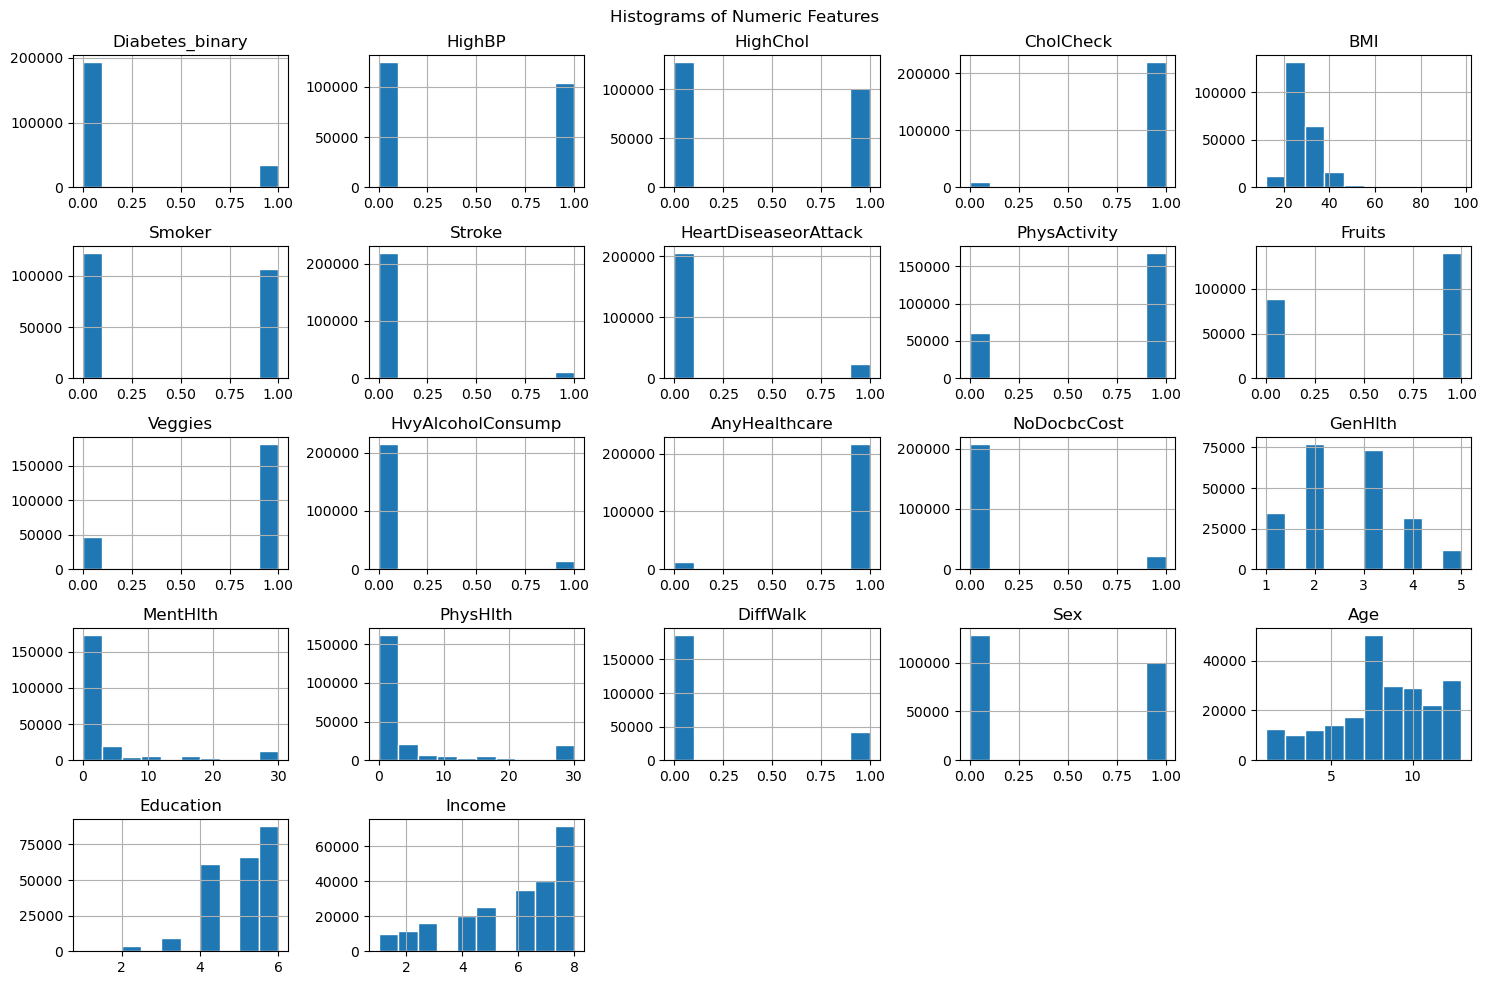

In [73]:
data.hist(figsize=(15, 10), edgecolor='white')

plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()

### Check for Outliers & Skewed variables

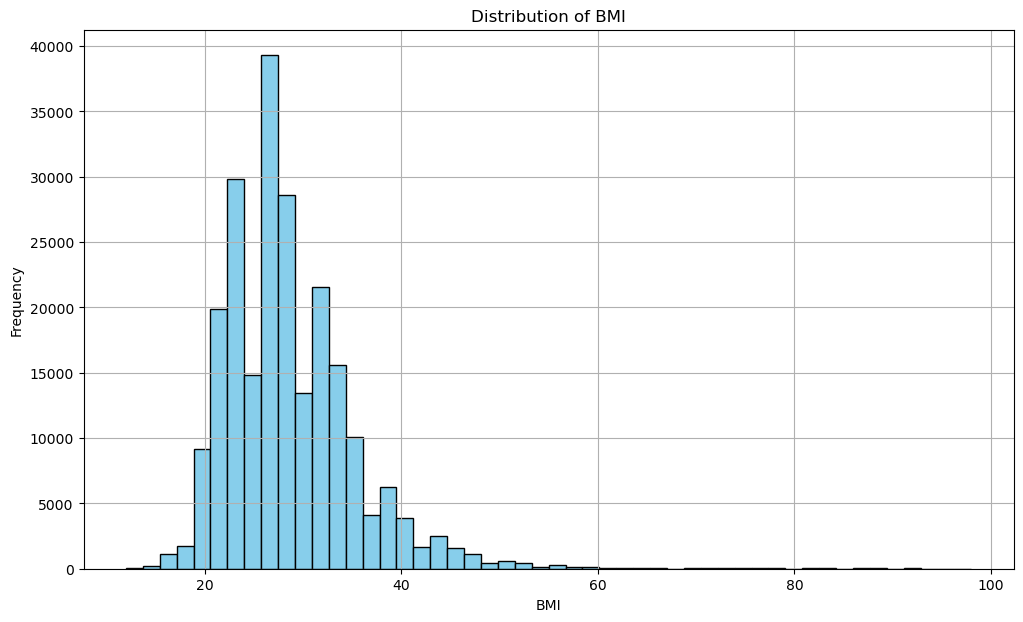

In [74]:
# Plotting the distribution of BMI values - 
plt.figure(figsize=(12, 7))
data['BMI'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid()
plt.show()

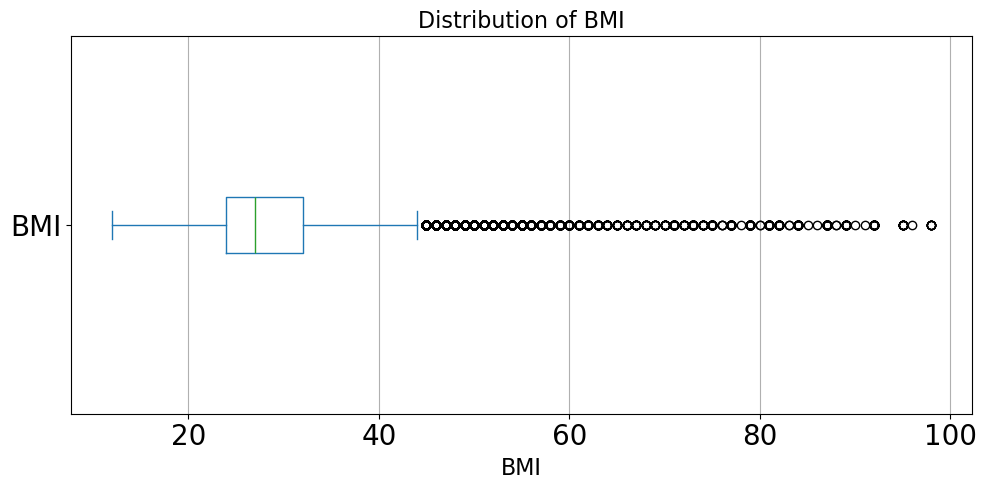

In [78]:
# Plotting the distribution of BMI values - 
plt.figure(figsize=(10, 5))
data['BMI'].plot(kind='box', vert=False)
plt.title('Distribution of BMI', fontsize=16)
plt.xlabel('BMI', fontsize=16)
plt.ylabel('', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [40]:
data['BMI'].describe()

count    229474.000000
mean         28.687507
std           6.789204
min          12.000000
25%          24.000000
50%          27.000000
75%          32.000000
max          98.000000
Name: BMI, dtype: float64

#### BMI ranges (adapted from WHO*): 

Underweight: < 18.5

Normal weight: 18.5 - 24.9

Overweight: 25 - 29.9

Obese: 30 or greater

*Source: 

https://www.health.govt.nz/system/files/documents/publications/understanding-excess-body-weight-nzhs-apr15-v2.pdf

For our dataset:

* The minimum BMI of 12 is extremely low but not impossible. It could represent severe malnutrition or data entry errors.
  
* The maximum BMI of 98 is extremely high. While BMIs over 65 are rare, they are possible in cases of extreme obesity (which is a relevant factor in diabetes studies).

In [41]:
extreme_low = (data['BMI'] < 15).sum()
extreme_high = (data['BMI'] > 65).sum()
print(f"BMI < 15: {extreme_low}")
print(f"BMI > 65: {extreme_high}")

BMI < 15: 68
BMI > 65: 650


### Rationale to remove these rows with extreme BMIs:

*Data Integrity: 

Removing these outliers may help ensure that the dataset more accurately reflects the population.


*Model Performance: 

Discarding these extreme values can improve the performance and robustness of the models by reducing noise.

*Minimal Impact: 

Given the extremely small proportion of extreme values, removing them will not significantly affect the overall size or representativeness of the dataset.

In [42]:
# Remove rows with extreme BMI values
data = data[(data['BMI'] >= 15) & (data['BMI'] <= 65)]

In [18]:
data.shape

(228756, 22)

### Comparing distribution of features across diabetes classes

In [22]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [23]:
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

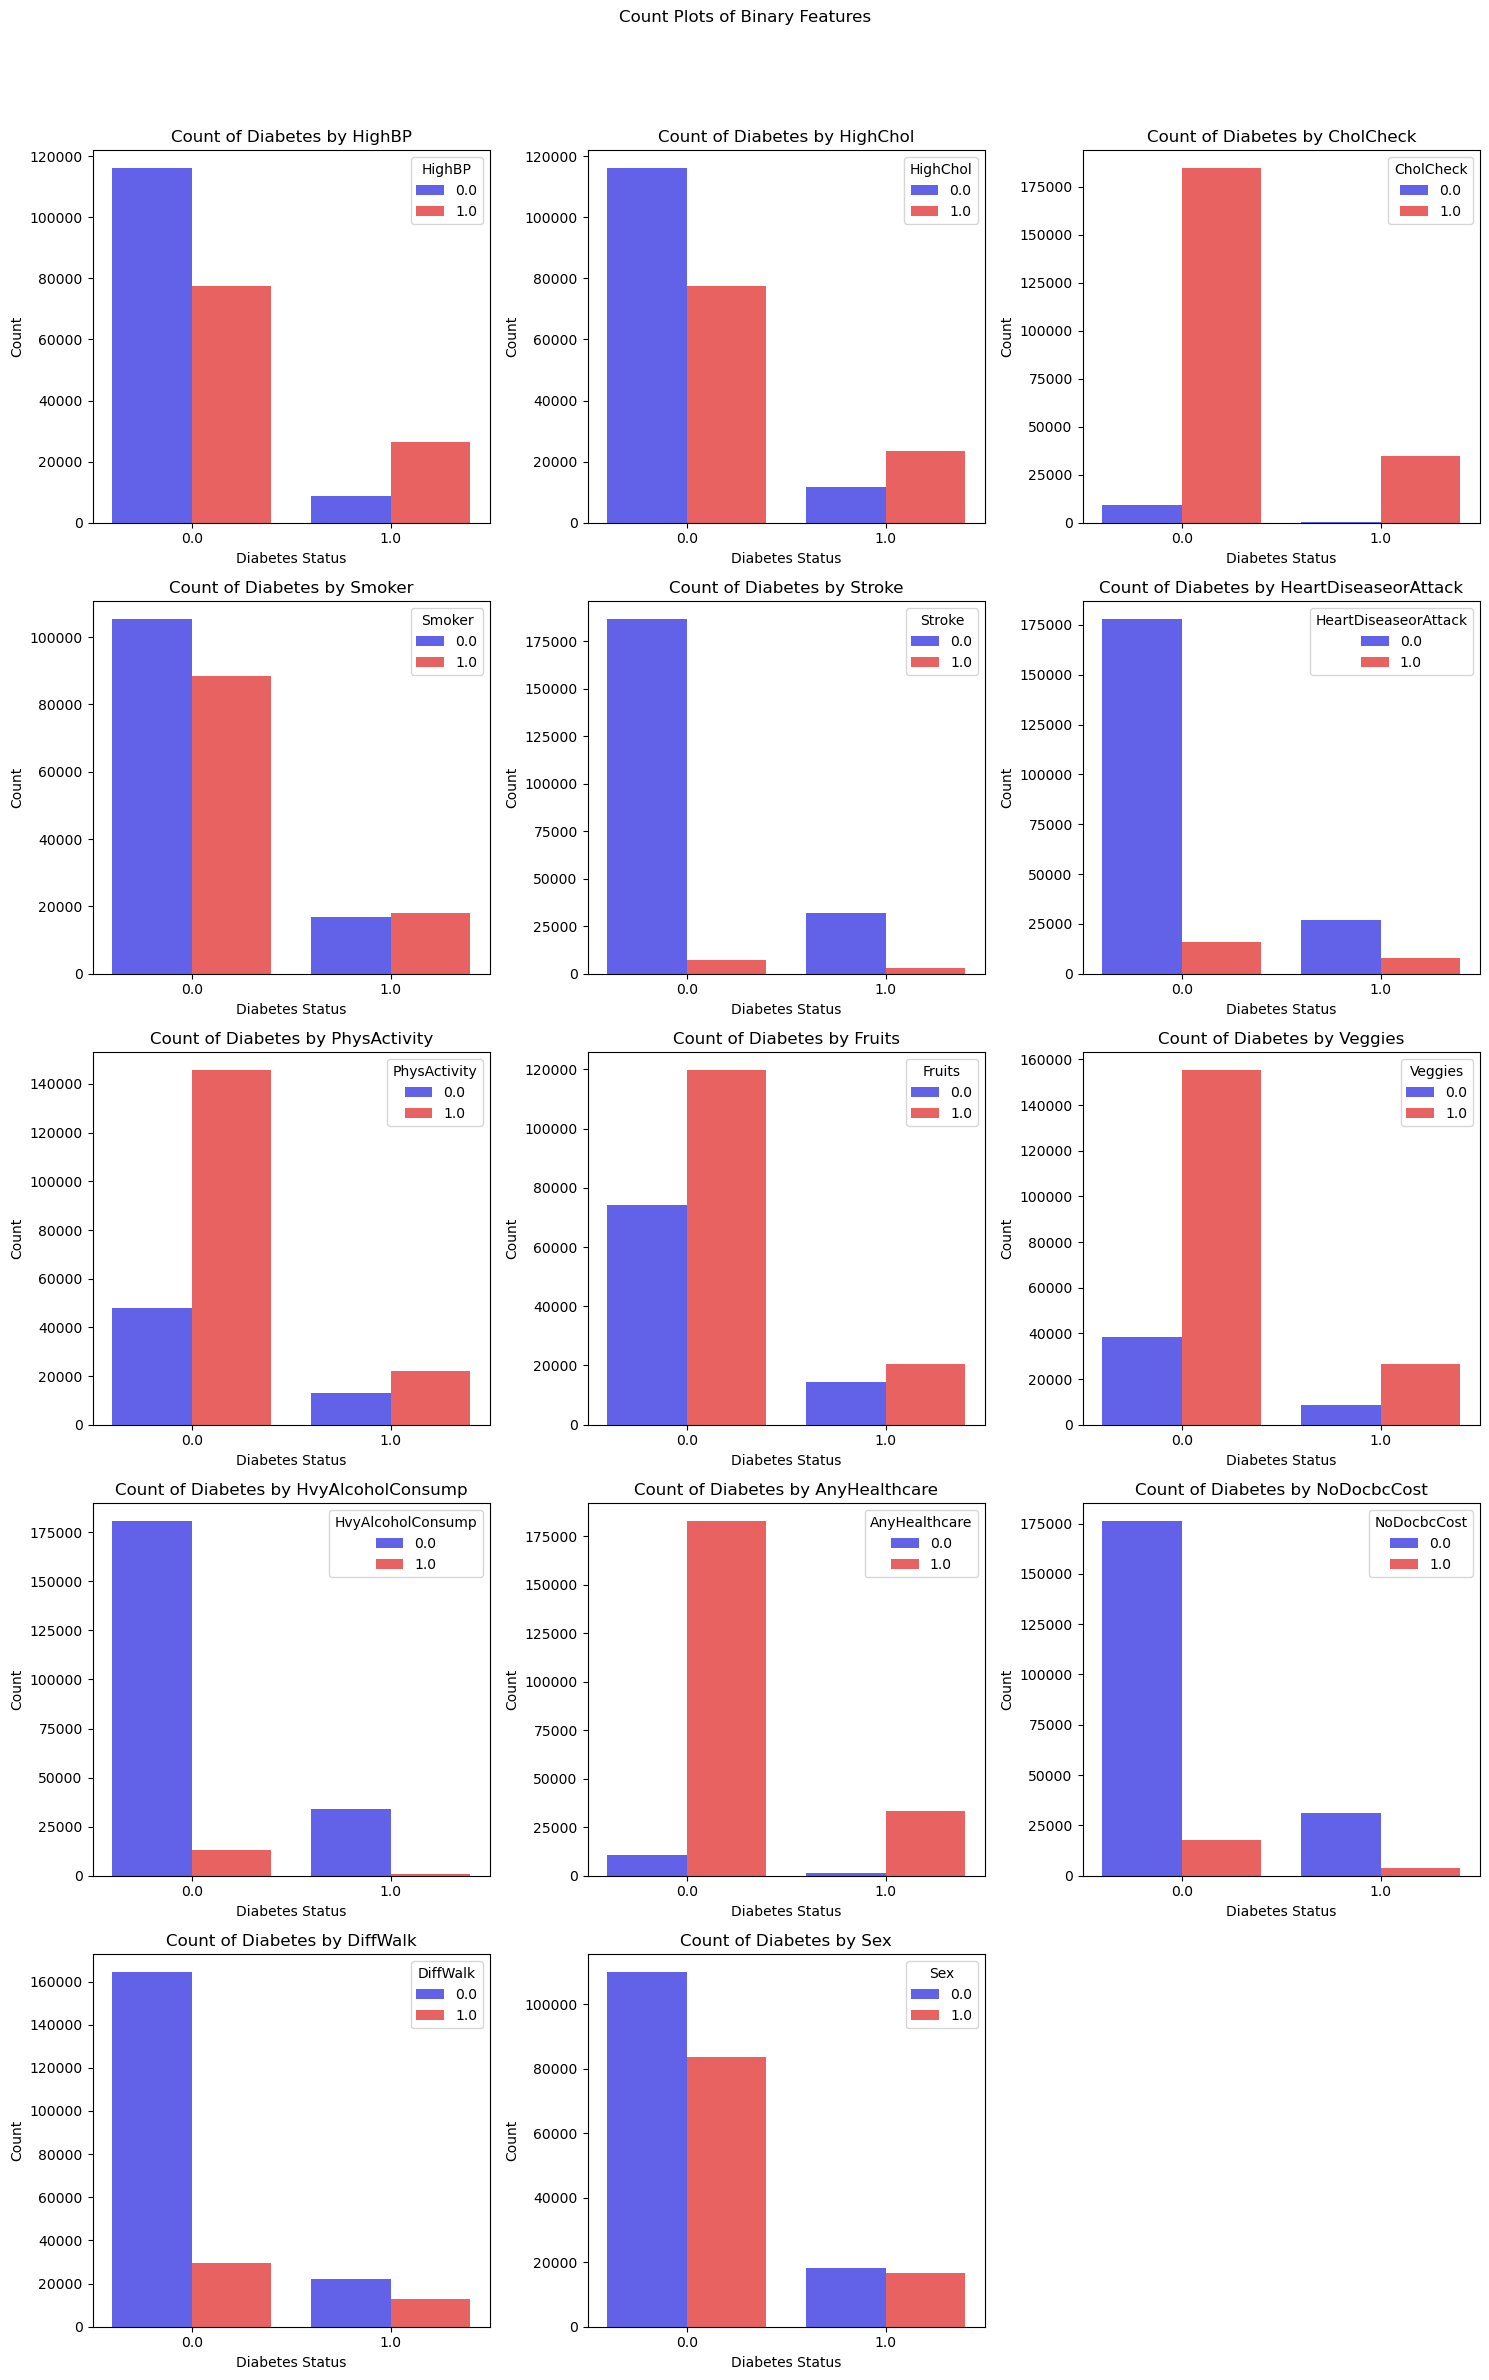

In [24]:
plt.figure(figsize=(15, 25))
for i, feature in enumerate(binary_features, 1): # start the index counting from 1
    plt.subplot(len(binary_features) // 3 + 1, 3, i) # 3 columns in the grid of the subplot
    sns.countplot(x='Diabetes_binary', hue=feature, data=data,palette=['blue', 'red'], alpha=0.7)
    plt.title(f'Count of Diabetes by {feature}')
    plt.xlabel('Diabetes Status')
    plt.ylabel('Count')
    
plt.suptitle('Count Plots of Binary Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust to not overlap with the main title
plt.show()


In [25]:
ordinal_features = ['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


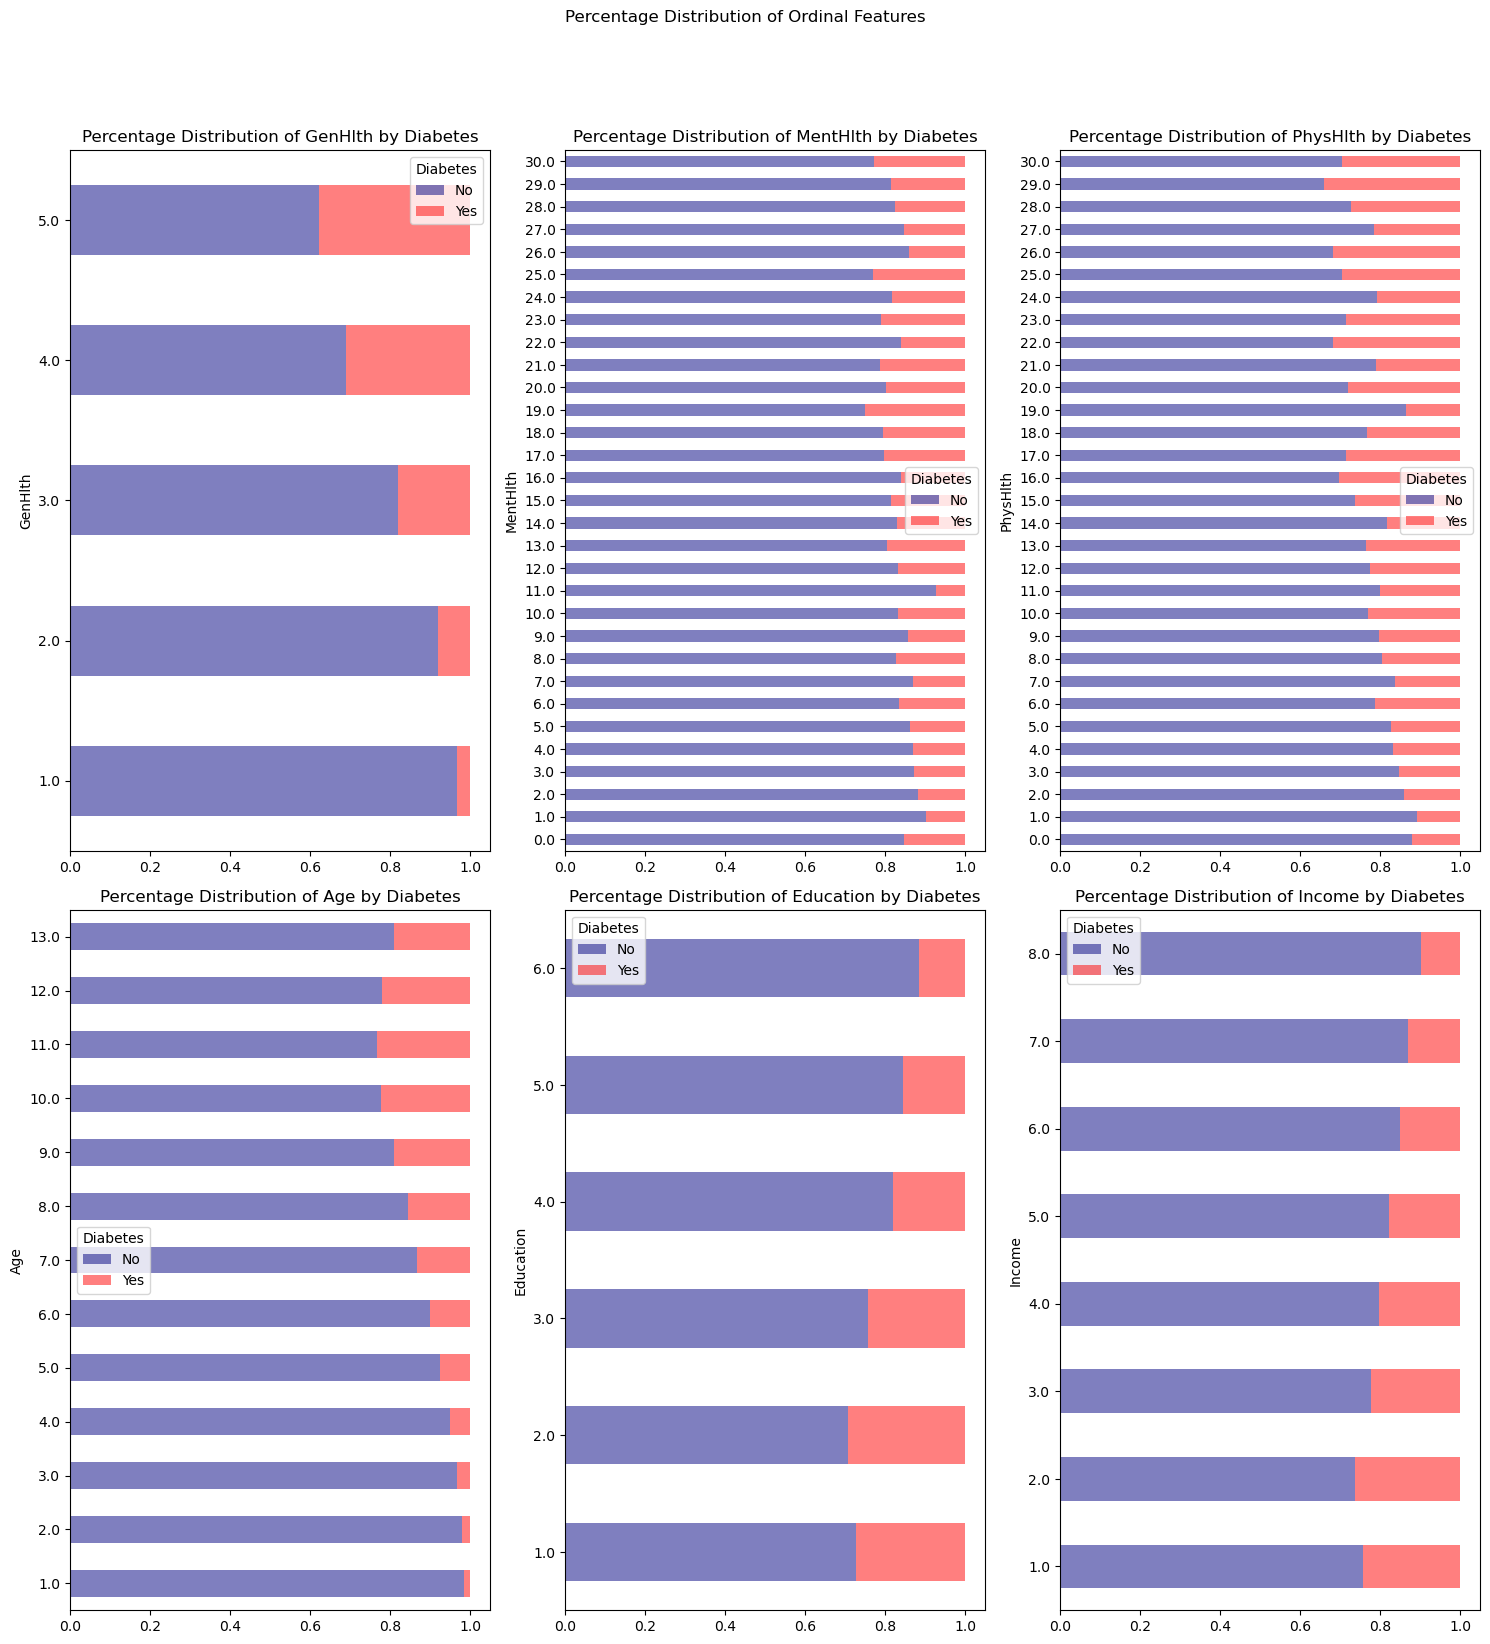

In [26]:
# Distribution of Ordinal Features by Diabetes

plt.figure(figsize=(15, 25))
for i, feature in enumerate(ordinal_features, 1): # start the index counting from 1
    ax = plt.subplot(len(ordinal_features) // 3 + 1, 3, i) # 3 columns in the grid of the subplot
    percentage = data.groupby(feature)['Diabetes_binary'].value_counts(normalize=True).unstack()
    percentage.plot(kind='barh', stacked=True, color=['navy','red'], alpha=0.5, ax=ax)
    ax.legend(title='Diabetes', labels=['No', 'Yes'])
    ax.set_title(f'Percentage Distribution of {feature} by Diabetes')
        
plt.suptitle('Percentage Distribution of Ordinal Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust to not overlap with the main title
plt.show()

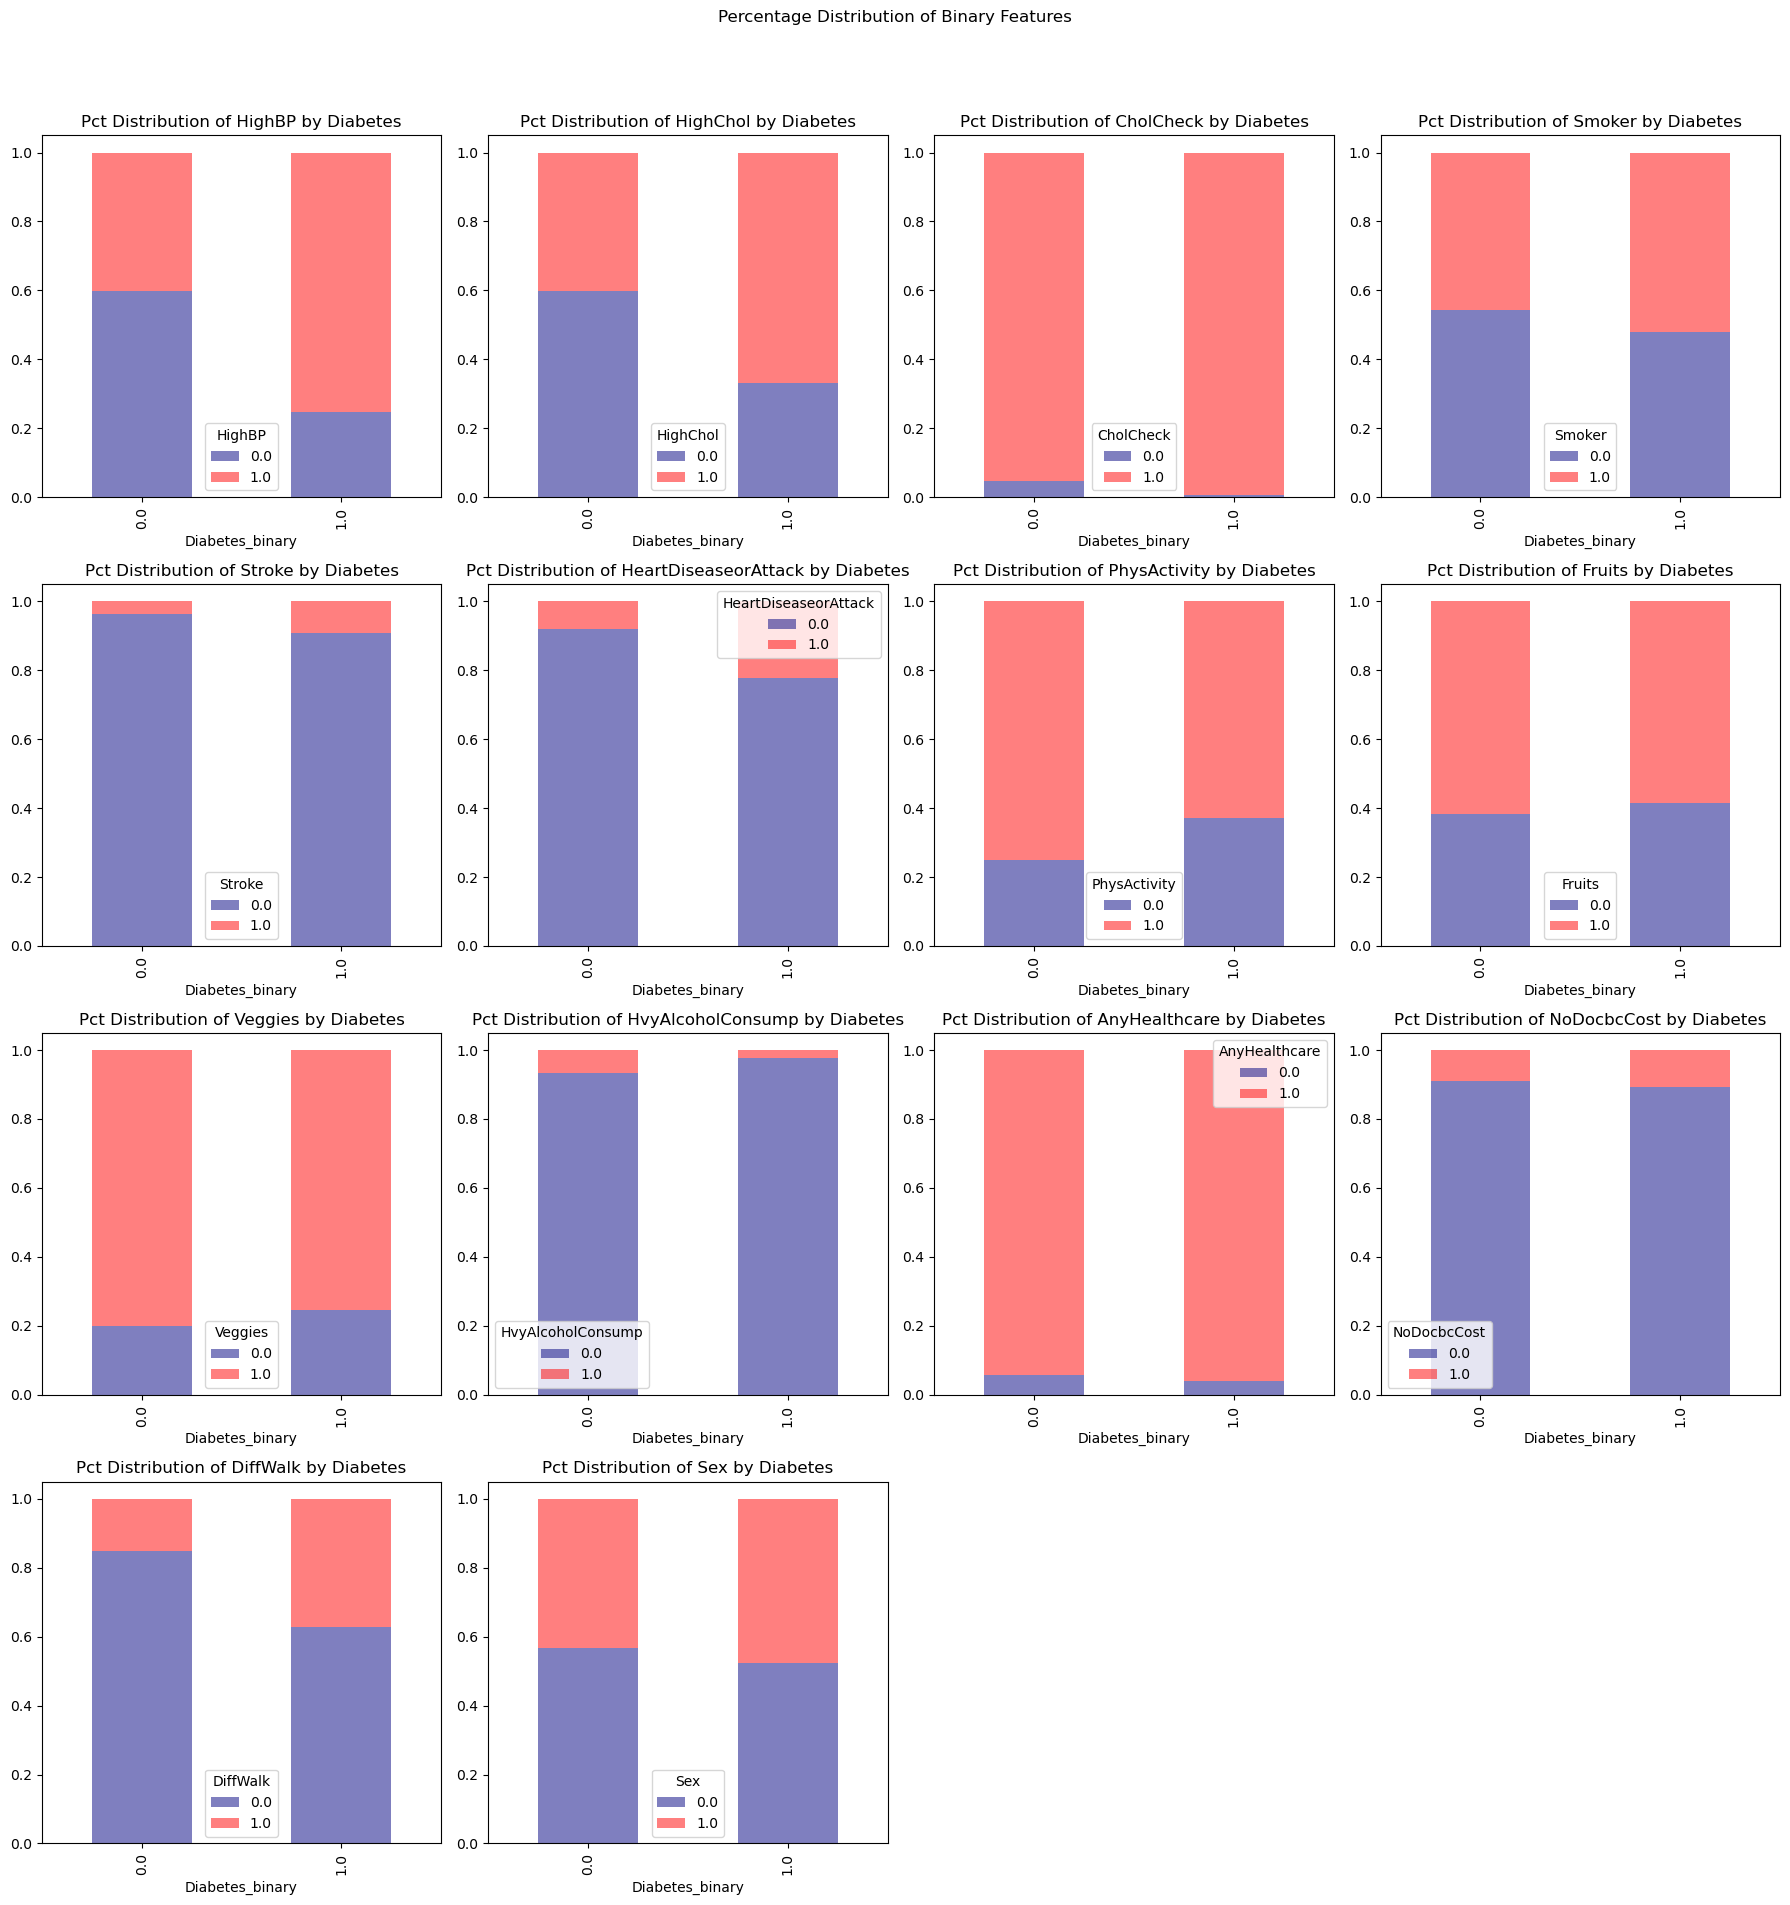

In [27]:
# Distribution of Binary Features by Diabetes

plt.figure(figsize=(18, 20))
for i, feature in enumerate(binary_features, 1): # start the index counting from 1
    ax = plt.subplot(len(binary_features) // 4 + 1, 4, i) # 4 columns in the grid of the subplot
    percentage = data.groupby('Diabetes_binary')[feature].value_counts(normalize=True).unstack()
    percentage.plot(kind='bar', stacked=True, color=['navy','red'], alpha=0.5, ax=ax)
    ax.legend(title=feature)#'Diabetes', labels=['No', 'Yes'])
    ax.set_title(f'Pct Distribution of {feature} by Diabetes')
        
plt.suptitle('Percentage Distribution of Binary Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust to not overlap with the main title
plt.show()

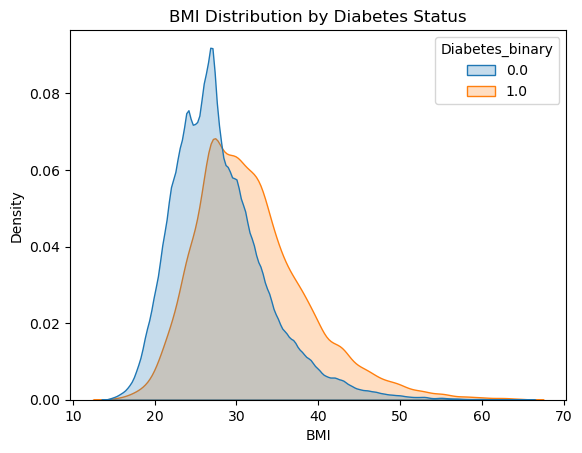

In [28]:
#To visualise continuous variable BMI using density plot

sns.kdeplot(data=data, x='BMI', hue='Diabetes_binary', fill=True, 
            common_norm=False) # Each class will be normalised separately, giving KDE curves with comparable heights

# Title and labels
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Density')

plt.show()

### Interpretation of the Density Plot
The height of the curve at any given point on the x-axis (BMI) reflects the concentration of data points around that BMI value, NOT the number of individuals. 

Higher density means that there are more individuals with that specific BMI in the respective class.

The plot shows that individuals with diabetes tend to have higher BMIs, but there is a significant overlap, suggesting that BMI alone is not a perfect predictor of diabetes.

### Check Correlation

In [29]:
# Check correlation matrix:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

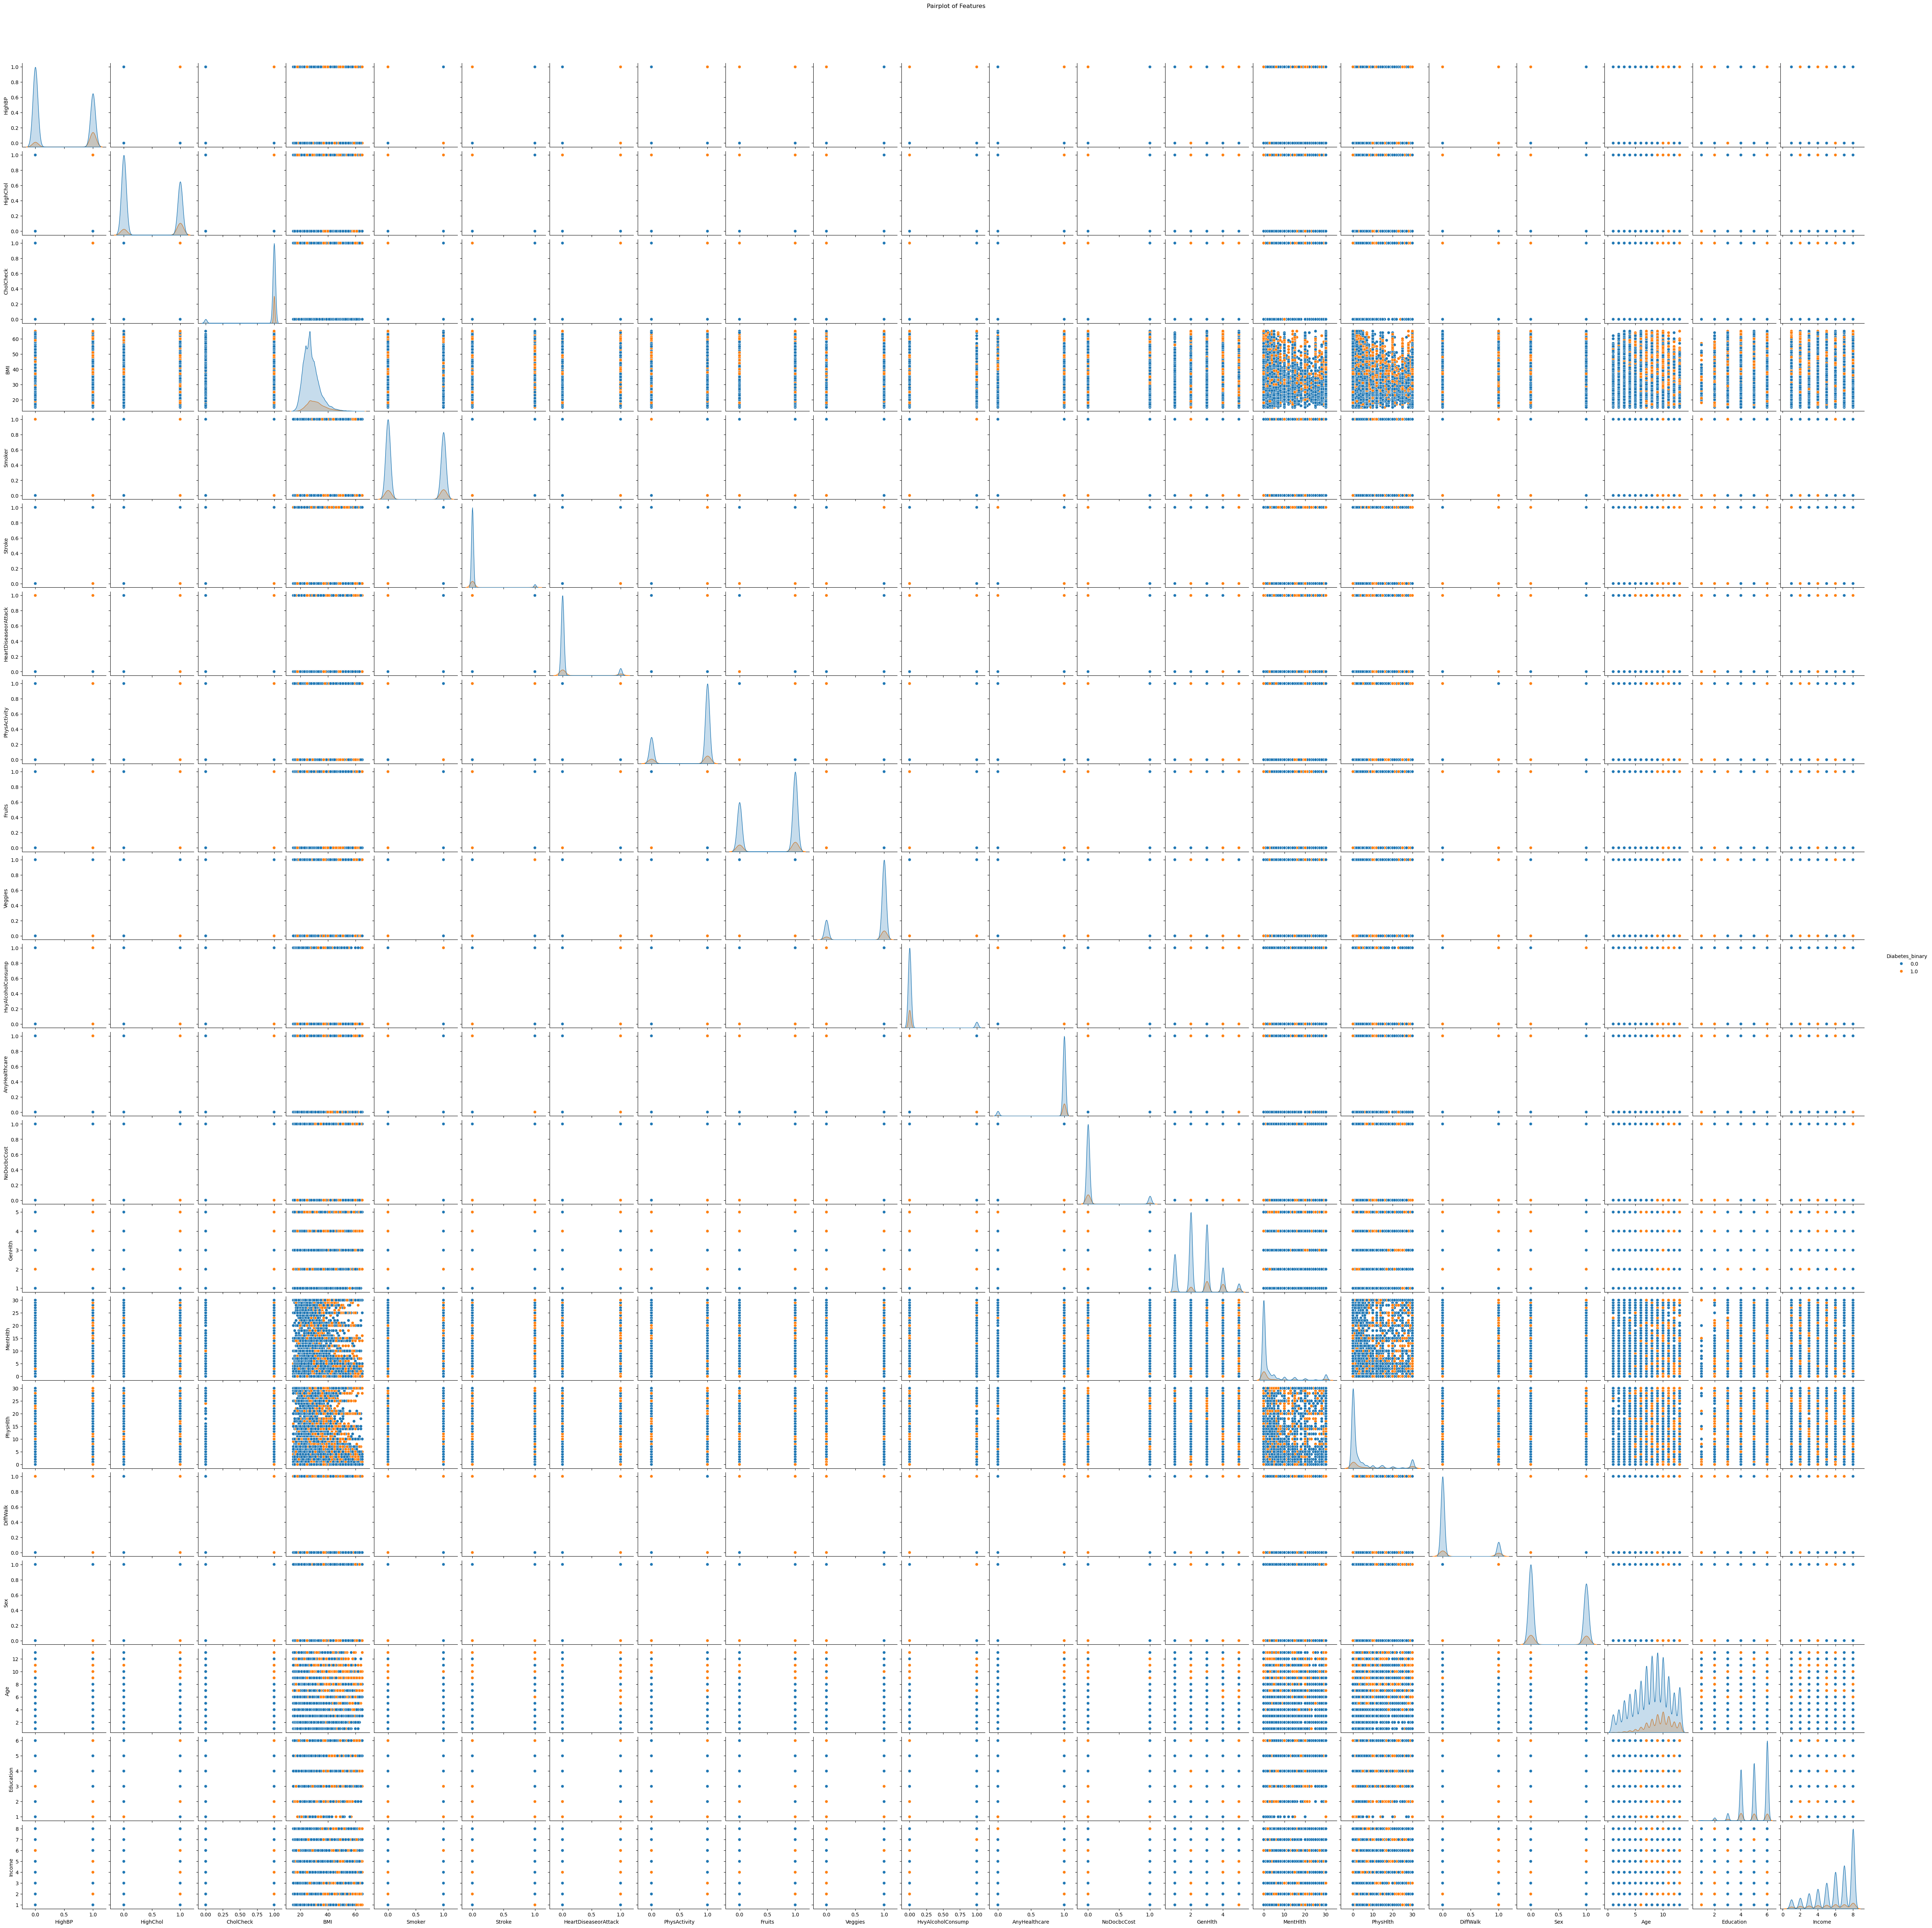

CPU times: total: 12min 48s
Wall time: 48min 44s


In [19]:
%%time
# Create pairplot
sns.pairplot(data, hue='Diabetes_binary')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

<Axes: xlabel='Age', ylabel='BMI'>

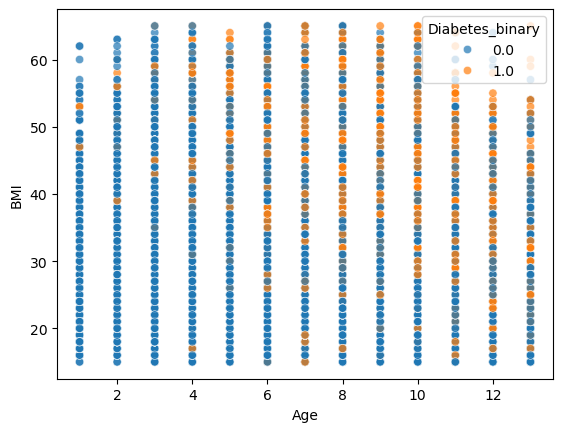

In [49]:
# Examine one of the plots:
sns.scatterplot(x='Age', y='BMI', hue='Diabetes_binary', data=data, alpha=0.7)


### The above pairplot & scatterplot did not give us much useful information

---

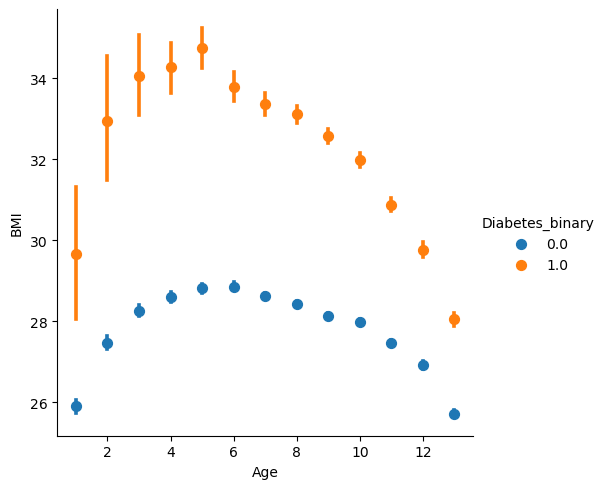

In [50]:
plot_df=data.copy()
# Age/BMI Scatterplot
sns.lmplot(
    data=plot_df,
    x="Age",
    y="BMI",    
    hue="Diabetes_binary",
    x_bins=1000,
    fit_reg=False,
)

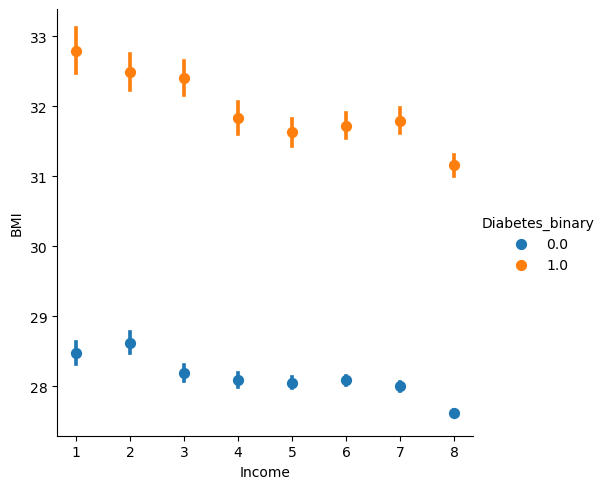

In [51]:

# Income/BMI Scatterplot
sns.lmplot(
    data=plot_df,
    x="Income",
    y="BMI",    
    hue="Diabetes_binary",
    x_bins=1000,
    fit_reg=False,
)

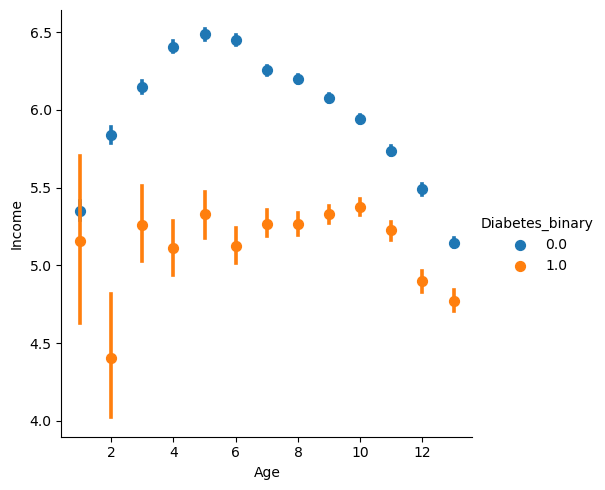

In [52]:

# Age/Income Scatterplot
sns.lmplot(
    data=plot_df,
    x="Age",
    y="Income",    
    hue="Diabetes_binary",
    x_bins=1000,
    fit_reg=False
)

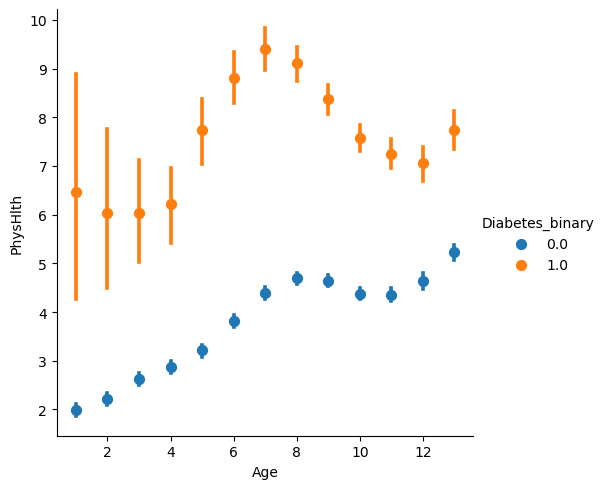

In [53]:

# Age/Poor Physical Health Days Scatterplot
sns.lmplot(
    data=plot_df,
    x="Age",
    y="PhysHlth",    
    hue="Diabetes_binary",
    x_bins=1000,
    fit_reg=False,
)

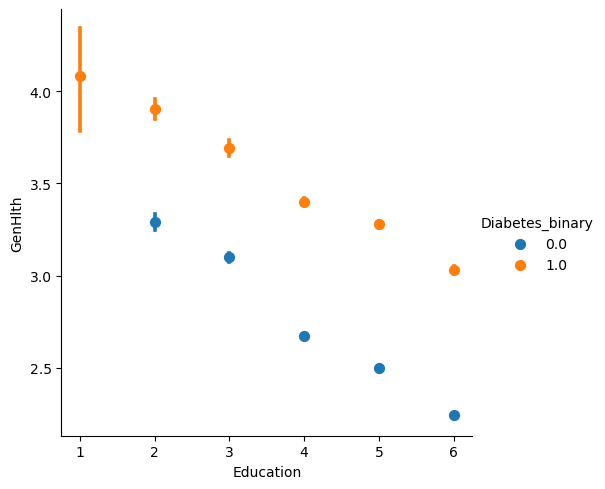

In [54]:

# Education / GenHlth Scatterplot
sns.lmplot(
    data=plot_df,
    x="Education",
    y="GenHlth",    
    hue="Diabetes_binary",
    x_bins=1000,
    fit_reg=False,
)

### Potential Collinearity

The highest coorelation is found between the following pairs of features:

*GenHlth with PhysHlth (0.516)

*PhysHlth with DiffWalk (0.466)

*GenHlth with DiffWalk (0.447)


These correlations are moderate and do not necessarily indicate a severe collinearity issue. 

**We may keep these features as they are for now, and monitor our machine learning results / model performance, and do any feature engineering in the future if needed.**

In [43]:
# Compute the correlation with the target variable
corr_target = data.corrwith(data['Diabetes_binary'], axis=0)

corr_target.sort_values(ascending=False)

Diabetes_binary         1.000000
GenHlth                 0.276585
HighBP                  0.254068
BMI                     0.224059
DiffWalk                0.204705
HighChol                0.194997
Age                     0.177392
HeartDiseaseorAttack    0.167931
PhysHlth                0.155330
Stroke                  0.099086
CholCheck               0.072582
MentHlth                0.053741
Smoker                  0.045687
Sex                     0.032967
AnyHealthcare           0.025448
NoDocbcCost             0.019854
Fruits                 -0.024645
Veggies                -0.041530
HvyAlcoholConsump      -0.065919
PhysActivity           -0.099973
Education              -0.102600
Income                 -0.140278
dtype: float64

In [44]:
# Keep only those features that have a correlation greater than 0.1 (positive correlation) or less than -0.1 (negative correlation)
corr_short = corr_target[(corr_target != 1.0)&((corr_target > 0.1)|(corr_target < -0.1))]
new_data = data[corr_short.index.tolist()]
new_data.head()

HighBP  HighChol   BMI  HeartDiseaseorAttack  GenHlth  PhysHlth  DiffWalk  \
0     1.0       1.0  40.0                   0.0      5.0      15.0       1.0   
1     0.0       0.0  25.0                   0.0      3.0       0.0       0.0   
2     1.0       1.0  28.0                   0.0      5.0      30.0       1.0   
3     1.0       0.0  27.0                   0.0      2.0       0.0       0.0   
4     1.0       1.0  24.0                   0.0      2.0       0.0       0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0

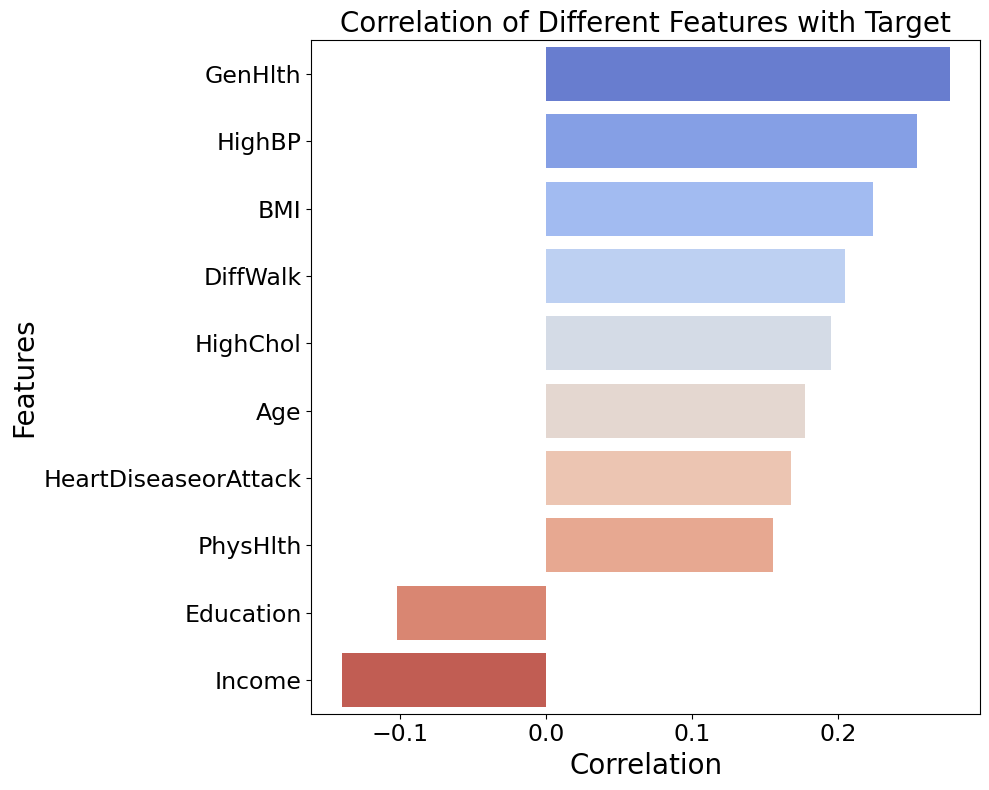

In [46]:
# Sort the correlation values in descending order
corr_desc = corr_short.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))

ax = sns.barplot(x=corr_desc.values,  y=corr_desc.index, 
                 hue=corr_desc.index,
                 palette='coolwarm',
                 legend=False
                )

# Adding labels and title
plt.xlabel('Correlation', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.title('Correlation of Different Features with Target', fontsize=20)

# Increase tick label font size
plt.tick_params(axis='both', which='major', labelsize=17)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

## Check the target variable

In [51]:
diabetes_counts=data['Diabetes_binary'].value_counts()
diabetes_counts

Diabetes_binary
0.0    193770
1.0     34986
Name: count, dtype: int64

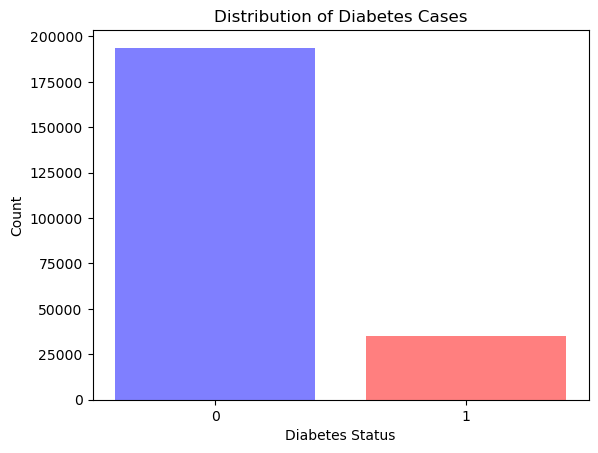

In [52]:
colors = ['blue', 'red']
plt.bar(diabetes_counts.index, diabetes_counts.values, color = colors, alpha=0.5)  
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Cases')

plt.show()


In [53]:
import matplotlib.colors as mcolors

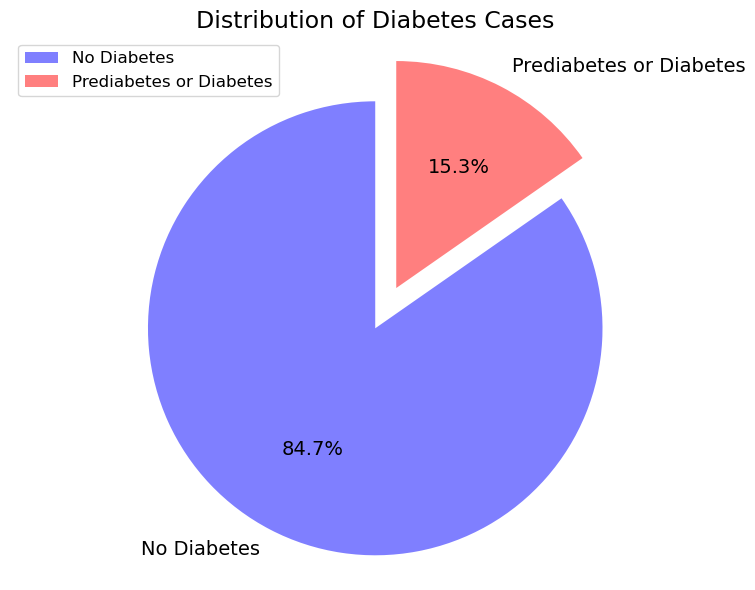

In [55]:
fig1, ax1 = plt.subplots(figsize=(8, 6))

colors_with_alpha = [mcolors.to_rgba(c, alpha=0.5) for c in colors]

ax1.pie(diabetes_counts, 
        explode=(0.1, 0.1), 
        labels=['No Diabetes', 'Prediabetes or Diabetes'], 
        autopct='%1.1f%%', 
        shadow=False, 
        startangle=90,
        colors=colors_with_alpha,
        textprops={'fontsize': 14})

ax1.axis('equal')
plt.title('Distribution of Diabetes Cases', fontsize=17)

# Increase legend font size
plt.legend(fontsize=12)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

### Diabetes Prevalence

Based on the information from the CDC's National Diabetes Statistics Report, the prevalence of diabetes (both diagnosed and undiagnosed) among U.S. adults was approximately **14.7%** during the period from 2017 to 2020. Additionally, about **38%** of U.S. adults were found to have prediabetes. These figures indicate that a substantial portion of the population is affected by diabetes and prediabetes, with the combined prevalence potentially reaching **half** of the adult population (around 52.7%, CDC)​​ ​.

### Strategy for Data Imbalance Handling

A) **Using SMOTE to synthesize samples for the minority class**:

Given this high prevalence, it is reasonable to consider adjusting the dataset to reflect these real-world ratios if they are significantly underrepresented. 

We aim to simulate the combined diabetes and prediabetes ratio in the general population, thereby ensuring our models are trained on a representative sample.

B) **Adjusting class weights**:


Setting `class_weight='balanced'` in applicable models (on orginal imbalanced dataset).

==>>> Then compare the results to understand the impact of each approach above.


#### Some additional points to consider:

*Stratified sampling: 

When splitting the data into train/test sets, use stratified sampling to maintain the class distribution in both sets.


*Cross-validation: 

Use stratified k-fold cross-validation to ensure each fold maintains the overall class distribution.



*References:

https://www.cdc.gov/diabetes/php/data-research/index.html

https://www.cdc.gov/pcd/issues/2019/19_0109.htm

## Save selected columns for model training

In [62]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228756 entries, 0 to 253679
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                228756 non-null  float64
 1   HighChol              228756 non-null  float64
 2   BMI                   228756 non-null  float64
 3   HeartDiseaseorAttack  228756 non-null  float64
 4   GenHlth               228756 non-null  float64
 5   PhysHlth              228756 non-null  float64
 6   DiffWalk              228756 non-null  float64
 7   Age                   228756 non-null  float64
 8   Education             228756 non-null  float64
 9   Income                228756 non-null  float64
dtypes: float64(10)
memory usage: 19.2 MB


In [63]:
# Add target variable to our dataframe
new_data['target']=data['Diabetes_binary']

In [64]:
new_data.head()

HighBP  HighChol   BMI  HeartDiseaseorAttack  GenHlth  PhysHlth  DiffWalk  \
0     1.0       1.0  40.0                   0.0      5.0      15.0       1.0   
1     0.0       0.0  25.0                   0.0      3.0       0.0       0.0   
2     1.0       1.0  28.0                   0.0      5.0      30.0       1.0   
3     1.0       0.0  27.0                   0.0      2.0       0.0       0.0   
4     1.0       1.0  24.0                   0.0      2.0       0.0       0.0   

    Age  Education  Income  target  
0   9.0        4.0     3.0     0.0  
1   7.0        6.0     1.0     0.0  
2   9.0        4.0     8.0     0.0  
3  11.0        3.0     6.0     0.0  
4  11.0        5.0     4.0     0.0

In [65]:
new_data.shape

(228756, 11)

In [66]:
# Save this new data frame to a csv file to be used for machine learning models
filepath = Path('diabetes_top10.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
new_data.to_csv(filepath, index=False)
